In [1]:
import torch
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
net = torch.load('./data/test/test/_2020_10_14_19_36_24_0000--s-0/params.pkl')

In [3]:
net

{'trainer/policy': TanhGaussianPolicy(
   (fc0): Linear(in_features=2, out_features=64, bias=True)
   (fc1): Linear(in_features=64, out_features=64, bias=True)
   (last_fc): Linear(in_features=64, out_features=1, bias=True)
   (last_fc_log_std): Linear(in_features=64, out_features=1, bias=True)
 ),
 'trainer/qf1': ConcatMlp(
   (fc0): Linear(in_features=3, out_features=64, bias=True)
   (fc1): Linear(in_features=64, out_features=64, bias=True)
   (last_fc): Linear(in_features=64, out_features=1, bias=True)
 ),
 'trainer/qf2': ConcatMlp(
   (fc0): Linear(in_features=3, out_features=64, bias=True)
   (fc1): Linear(in_features=64, out_features=64, bias=True)
   (last_fc): Linear(in_features=64, out_features=1, bias=True)
 ),
 'trainer/target_qf1': ConcatMlp(
   (fc0): Linear(in_features=3, out_features=64, bias=True)
   (fc1): Linear(in_features=64, out_features=64, bias=True)
   (last_fc): Linear(in_features=64, out_features=1, bias=True)
 ),
 'trainer/target_qf2': ConcatMlp(
   (fc0): L

In [18]:
disc = 100
bound = 1

Qvals = np.zeros((disc,disc,11))

for i_ind, i in enumerate(np.linspace(-bound,bound,disc)):
    for j_ind, j in enumerate(np.linspace(-bound,bound,disc)):
        for a_ind,a in enumerate(np.linspace(-1,1,11)):
            inputs = torch.tensor([[i,j,a]]).float()
            Qvals[i_ind,j_ind,a_ind] = net['trainer/qf1'](inputs).detach().numpy()

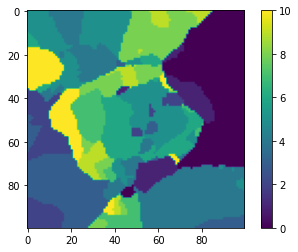

In [19]:
plt.imshow(np.argmax(Qvals,axis=2))
plt.colorbar()

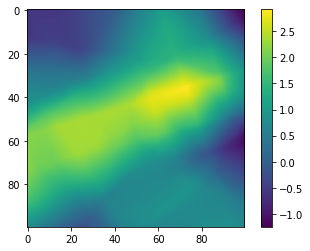

In [23]:
plt.imshow(Qvals[:,:,-1]) 
plt.colorbar()